In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#knock60
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz', binary=True)
print(model['United_States'])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

In [13]:
#knock61
model.similarity('United_States', 'U.S.')

0.73107743

In [11]:
#knock62
simularities = model.most_similar('United_States')
for i, s in enumerate(simularities):
  print(f'{i+1}: {s[0]}\t{s[1]}')

1: Unites_States	0.7877248525619507
2: Untied_States	0.7541370987892151
3: United_Sates	0.7400724291801453
4: U.S.	0.7310774326324463
5: theUnited_States	0.6404393911361694
6: America	0.6178410053253174
7: UnitedStates	0.6167312264442444
8: Europe	0.6132988929748535
9: countries	0.6044804453849792
10: Canada	0.601906955242157


In [14]:
#knock63
simularities = model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])
for i, s in enumerate(simularities):
  print(f'{i+1}: {s[0]}\t{s[1]}')

1: Greece	0.6898480653762817
2: Aristeidis_Grigoriadis	0.560684859752655
3: Ioannis_Drymonakos	0.5552908778190613
4: Greeks	0.545068621635437
5: Ioannis_Christou	0.5400862097740173
6: Hrysopiyi_Devetzi	0.5248445272445679
7: Heraklio	0.5207759737968445
8: Athens_Greece	0.516880989074707
9: Lithuania	0.5166865587234497
10: Iraklion	0.5146791338920593


In [12]:
#knock64
from tqdm import tqdm
with open('/content/drive/MyDrive/questions-words.txt') as f:
  ls = f.read().splitlines()

d = []
c = None
for l in tqdm(ls):
    if l.startswith(':'):
        c = l[2:]
    else:
        lst = [c] + l.split(' ') + list(model.most_similar(positive=[l.split(' ')[1], l.split(' ')[2]], negative=[l.split(' ')[0]], topn=1)[0])
        d.append(lst)

with open('/content/drive/MyDrive/questions-words-ans.txt', 'w') as fo:
  for i in d:
    fo.write(' '.join([str(j) for j in i]) + '\n')

100%|██████████| 19558/19558 [1:51:16<00:00,  2.93it/s]


In [17]:
#knock65
sem_n = 0
sem_a = 0
syn_n = 0
syn_a = 0
with open('/content/drive/MyDrive/questions-words-ans.txt') as f:
  for l in tqdm(f):
    l = l.split(' ')
    if not l[0].startswith('gram'):
      sem_n += 1
      if l[4] == l[5]:
        sem_a += 1
    else:
      syn_n += 1
      if l[4] == l[5]:
        syn_a += 1

print(f'\nsemantic analogy: {sem_a/sem_n:.3f}')
print(f'semantic analogy: {syn_a/syn_n:.3f}')

19544it [00:00, 704142.71it/s]


semantic analogy: 0.731
semantic analogy: 0.740


In [29]:
#knock66
from scipy.stats import spearmanr

human = []
w2v = []
with open('/content/drive/MyDrive/combined.csv', encoding='utf-8') as f:
    next(f)
    for r in f:
        cols = r.rstrip().split(',')
        human.append(float(cols[2]))
        w2v.append(model.similarity(cols[0], cols[1]))

correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数: {correlation}')

スピアマン相関係数: 0.7000166486272194


In [32]:
#knock67
from sklearn.cluster import KMeans
import numpy as np

c1 = ['capital-common-countries', 'capital-world']
c2 = ['currency', 'gram6-nationality-adjective']
cs = set()
with open('/content/drive/MyDrive/questions-words-ans.txt', encoding='utf-8') as f:
    for r in f:
        cols = r.strip().split(' ')
        if cols[0] in c1:
            country = cols[1]
            cs.add(country)
        elif cols[0] in c2:
            country = cols[1]
            cs.add(country)
        else:
            continue
cs = list(cs)
#print(len(cs))
#print(cs)

cs_v = [model[country] for country in cs]

kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(cs_v)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([cs[k] for k in cluster]))

cluster 0
Montevideo, Santiago, Athens, Madrid, Lima, Amman, Baghdad, Valletta, Lisbon, Georgetown, Paris, Vienna, Copenhagen, London, Rabat, Paramaribo, Nassau, Beirut, Nuuk, Ottawa, Havana, Brussels, Vaduz, Dublin, Roseau, Stockholm, Muscat, Damascus, Tunis, Algiers, Bern, Doha, Rome, Tripoli, Kingston, Oslo, Cairo, Berlin
cluster 1
Maputo, Antananarivo, Harare, Monrovia, Luanda, Libreville, Lilongwe, Nairobi, Asmara, Lusaka, Kigali, Kampala, Dakar, Conakry, Khartoum, Bujumbura, Nouakchott, Accra, Niamey, Bamako, Windhoek, Banjul, Mogadishu, Abuja, Gaborone
cluster 2
Lithuania, Slovakia, Thailand, Croatia, Belarus, Peru, Brazil, Norway, England, China, Albania, Spain, Argentina, USA, France, Korea, Moldova, Egypt, Germany, Europe, Macedonia, Malta, Iran, Chile, Israel, Bulgaria, Netherlands, Russia, Ireland, Italy, Austria, Iceland, Vietnam, Greece, Armenia, Portugal, Algeria, Sweden, Latvia, India, Malaysia, Denmark, Switzerland, Ukraine, Australia, Angola, Mexico, Poland, Nigeria, 

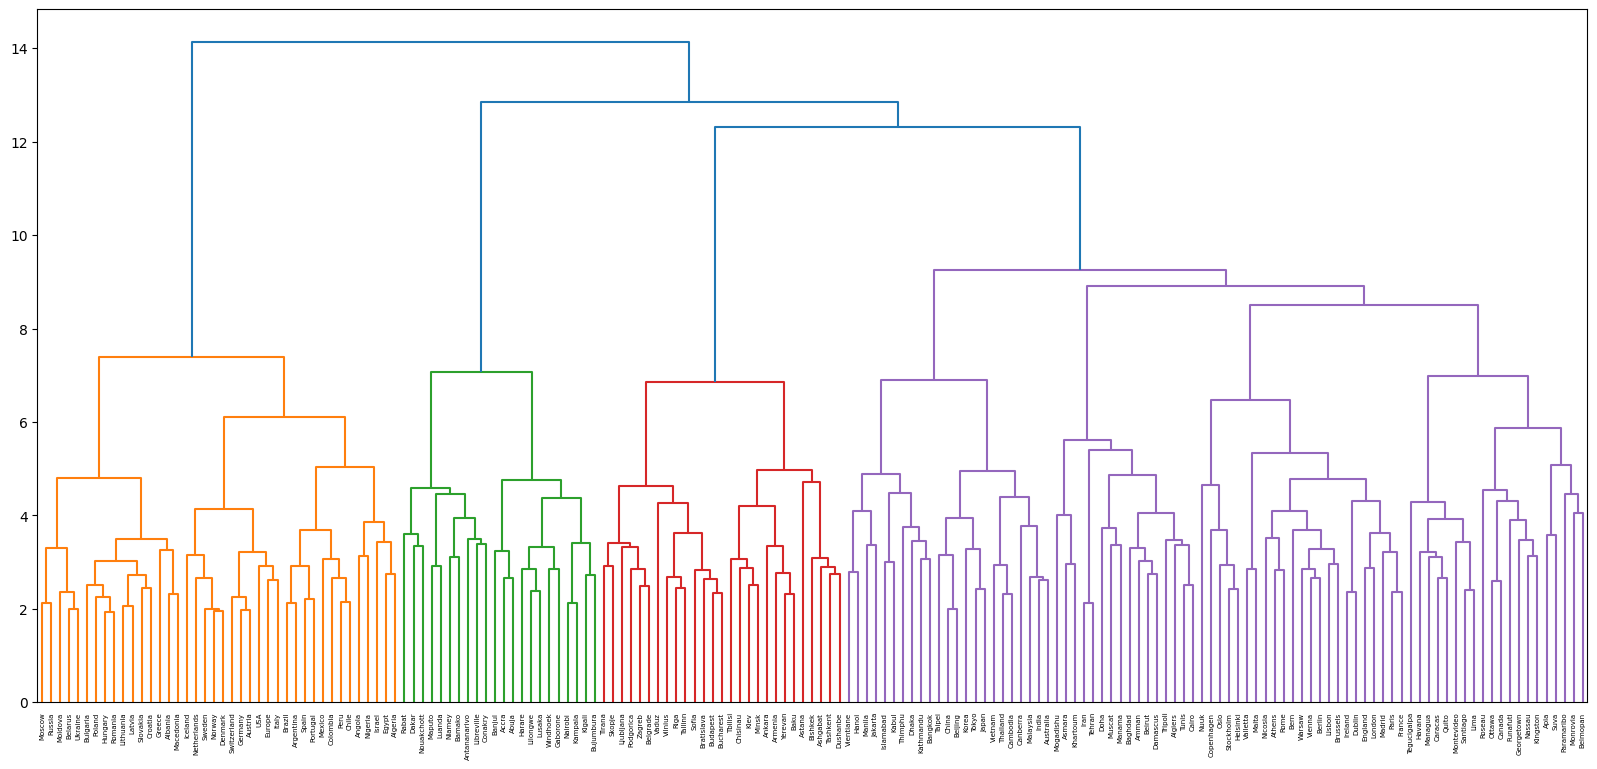

In [37]:
#knock68
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_r = linkage(cs_v, method='ward')

plt.figure(figsize=(20, 9))
dendrogram(linkage_r, labels=cs)
plt.savefig('k68.png')
plt.show()

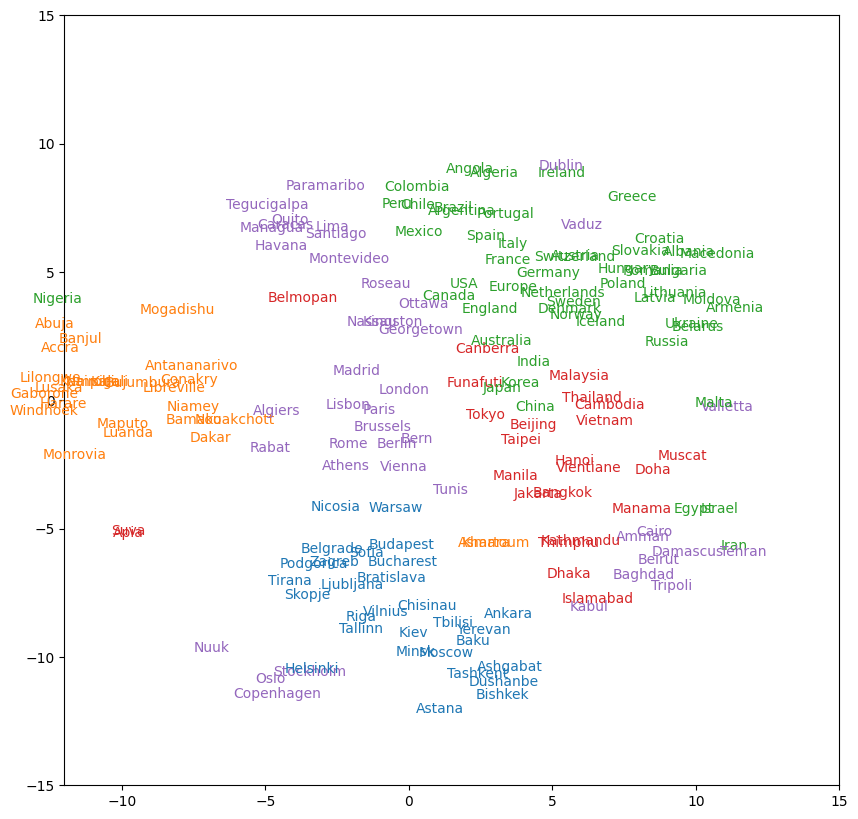

In [27]:
#knock69
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=64)
X_reduced = tsne.fit_transform(np.array(cs_v))
plt.figure(figsize=(10, 10))
for x, country, color in zip(X_reduced, cs, kmeans.labels_):
    plt.text(x[0], x[1], country, color='C{}'.format(color))
plt.xlim([-12, 15])
plt.ylim([-15, 15])
plt.savefig('k69.png')
plt.show()